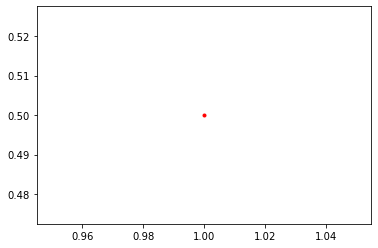

In [2]:
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

#FUncion prueba
def WF(r,alfa):
    r1 = r[0,0]**2 #+ r[0,1]**2+r[0,2]**2
    r2=r[1,0]**2 + r[1,1]**2+r[1,2]**2
    return  exp(-alfa*(r1+r2)/2.0)

#Energía local
def ELocal(r,alfa):
    r1 = r[0,0]**2 + r[0,1]**2+r[0,2]**2
    r2=r[1,0]**2 + r[1,1]**2+r[1,2]**2
    return 0.5*((r1+r2)*(-alfa*alfa+1)+alfa)

# Monte Carlo
def MonteCarlo():

    Nciclos= 20250
    Paso = 1
    # posiciones
    PosicionVieja = np.zeros((NW,Dimension), np.double)
    PsocionNueva = np.zeros((NW,Dimension), np.double)
    seed()
    # Parametro variacional
    alfa = 0.9
    for ia in range(Variaciones):
        alfa += .1
        alfaValues[ia] = alfa
        energia = 0.0
        energia2 = 0.0
        DeltaE = 0.0
        #Posiciones inicales
        for i in range(NW):
            for j in range(Dimension):
                PosicionVieja[i,j] = Paso*(random() - .5)
        wfold = WF(PosicionVieja,alfa)


        for MCci in range(Nciclos):
            if (MCci<Nciclos/2): #termalizacion
                energia=0.0
                energia2=0.0
                aux=0
            aux=aux+1

            for i in range(NW):
                for j in range(Dimension):
                    PsocionNueva[i,j] = PosicionVieja[i,j]+Paso*(random()-.5)
            wfnew = WF(PsocionNueva,alfa)

            #Metropolis
            if random() < wfnew**2/wfold**2:
                PosicionVieja= PsocionNueva.copy()
                wfold = wfnew
            DeltaE = ELocal(PosicionVieja,alfa)
            energia += DeltaE
            energia2 += DeltaE**2

        #Media, varianza, error
        energia /= aux
        energia2 /= aux
        varianza = energia2-energia**2
        error[ia] = sqrt(varianza/aux)
        Energias[ia] = energia    
    return Energias, alfaValues,PosicionVieja,error


NParticulas = 2
NW=10
Dimension = 3
Variaciones = 1
Energias = np.zeros((Variaciones,Variaciones))
alfaValues = np.zeros(Variaciones)
error = np.zeros(Variaciones)
(Energias, alfaValues,PosicionVieja,error) = MonteCarlo()

#ploteamos
plt.plot(alfaValues,Energias,'.-r')
plt.show()


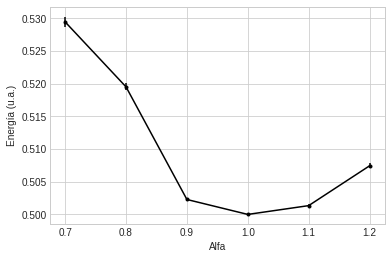

In [59]:
fig = plt.figure()
plt.style.use('seaborn-whitegrid')
plt.errorbar(AlphaValues,Energiess,yerr=error,fmt='.-k')
plt.xlabel("Alfa")
plt.ylabel("Energía (u.a.)")
plt.savefig('Ealga.png')
plt.show()

In [52]:
Energiess=[0.52944167,0.51950762,0.50228262,0.5,0.50134405,0.50743167]

In [ ]:
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

#FUncion prueba
def WF(r,alfa):
    r1 = r[0,0]**2# + r[0,1]**2
    return  exp(-alfa*r1/2.0)

#Energía local
def ELocal(r,alfa):
    r1 = r[0,0]**2# + r[0,1]**2
    return 0.5*(r1*(-alfa*alfa+1)+alfa)
def BoxMuller(u1,u2,sigma,mu):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    #Devolvemos z1 por ejemplo en su forma general
    return z1*sigma+mu
# Monte Carlo
def MonteCarlo():

    Nciclos= 202500
    Paso = 1
    # posiciones
    PosicionVieja = np.zeros((NW,Dimension), np.double)
    PsocionNueva = np.zeros((NW,Dimension), np.double)
    seed()
    # Parametro variacional
    alfa = 0.6
    for ia in range(Variaciones):
        alfa += .1
        alfaValues[ia] = alfa
        energia = 0.0
        energia2 = 0.0
        DeltaE = 0.0
        #Posiciones inicales
        for i in range(NW):
            for j in range(Dimension):
                PosicionVieja[i,j] = BoxMuller(u1,u2,1,0)
        wfold = WF(PosicionVieja,alfa)


        for MCci in range(Nciclos):
            if (MCci<Nciclos/2): #termalizacion
                energia=0.0
                energia2=0.0
                aux=0
            aux=aux+1

            for i in range(NW):
                for j in range(Dimension):
                    PsocionNueva[i,j] = PosicionVieja[i,j]+BoxMuller(u1,u2,1,0)
            wfnew = WF(PsocionNueva,alfa)

            DeltaE = ELocal(PosicionVieja,alfa)
            energia += DeltaE
            energia2 += DeltaE**2

        #Media, varianza, error
        energia /= aux
        energia2 /= aux
        varianza = energia2-energia**2
        error[ia] = sqrt(varianza/aux)
        Energias[ia] = energia    
    return Energias, alfaValues,PosicionVieja,error

NParticulas = 1
NW=500
Dimension = 1
Variaciones = 6
Energias = np.zeros((Variaciones,Variaciones))
alfaValues = np.zeros(Variaciones)
error = np.zeros(Variaciones)
(Energias, alfaValues,PosicionVieja,error) = MonteCarlo()

#ploteamos
plt.plot(alfaValues,Energias,'.-r')
plt.show()


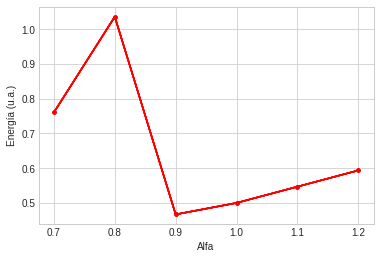

In [29]:
fig = plt.figure()
plt.style.use('seaborn-whitegrid')
plt.plot(AlphaValues,Energies,'.-r')
plt.xlabel("Alfa")
plt.ylabel("Energía (u.a.)")
plt.savefig('Ealga2.png')
plt.show()

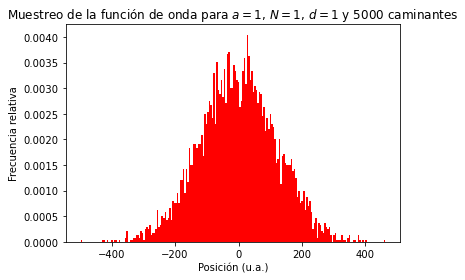

In [34]:
plt.hist(PositionOld, density=1, bins=200, histtype='bar', facecolor='r')
plt.xlabel("Posición (u.a.)")
plt.ylabel("Frecuencia relativa")
plt.title("Muestreo de la función de onda para $a=1$, $N=1$, $d=1$ y 5000 caminantes")
plt.savefig("MC-histo.png")

In [13]:
import sympy as sp
a,x = sp.symbols('a,x', positive=True)
def f(x):
    return ((a/sp.pi)**(1/4)*sp.exp(-0.5*a*x**2))**2*0.5*(x**2*(1-a**2)+a)
d=sp.integrate(f(x),(x,-sp.oo,sp.oo))

In [14]:
d

0.25*a**1.0 + 0.25/a

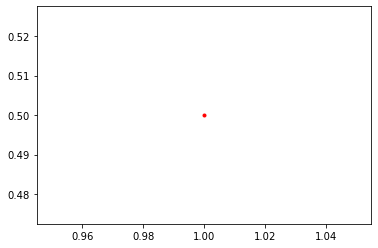

In [3]:
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

#FUncion prueba
def WF(r,alfa,NW):
    
    r1 = r[0,0]**2 + r[0,1]**2+r[0,2]**2
    r2=r[1,0]**2 + r[1,1]**2+r[1,2]**2
    return  exp(-alfa*(r1+r2)/2.0)

#Energía local
def ELocal(r,alfa):
    r1 = r[0,0]**2 + r[0,1]**2+r[0,2]**2
    r2=r[1,0]**2 + r[1,1]**2+r[1,2]**2
    return 0.5*((r1+r2)*(-alfa*alfa+1)+alfa)

# Monte Carlo
def MonteCarlo():

    Nciclos= 20250
    Paso = 1
    # posiciones
    PosicionVieja = np.zeros((NParticulas,Dimension), np.double)
    PsocionNueva = np.zeros((NParticulas,Dimension), np.double)
    seed()
    # Parametro variacional
    alfa = 0.9
    for ia in range(Variaciones):
        alfa += .1
        alfaValues[ia] = alfa
        energia = 0.0
        energia2 = 0.0
        DeltaE = 0.0
        #Posiciones inicales
        for i in range(NParticulas):
            for j in range(Dimension):
                PosicionVieja[i,j] = Paso*(random() - .5)
        wfold = WF(PosicionVieja,alfa)


        for MCci in range(Nciclos):
            if (MCci<Nciclos/2): #termalizacion
                energia=0.0
                energia2=0.0
                aux=0
            aux=aux+1
            for k in range (NW)
                for i in range(NParticulas):
                    for j in range(Dimension):
                        PsocionNueva[i,j] = PosicionVieja[i,j]+Paso*(random()-.5)
                wfnew = WF(PsocionNueva,alfa)

            #Metropolis
            if random() < wfnew**2/wfold**2:
                PosicionVieja= PsocionNueva.copy()
                wfold = wfnew
            DeltaE = ELocal(PosicionVieja,alfa)
            energia += DeltaE
            energia2 += DeltaE**2

        #Media, varianza, error
        energia /= aux
        energia2 /= aux
        varianza = energia2-energia**2
        error[ia] = sqrt(varianza/aux)
        Energias[ia] = energia    
    return Energias, alfaValues,PosicionVieja,error


NParticulas = 2
NW=10
Dimension = 3
Variaciones = 1
Energias = np.zeros((Variaciones,Variaciones))
alfaValues = np.zeros(Variaciones)
error = np.zeros(Variaciones)
(Energias, alfaValues,PosicionVieja,error) = MonteCarlo()

#ploteamos
plt.plot(alfaValues,Energias,'.-r')
plt.show()
